In [83]:
import pandas as pd

In [84]:
Fake_News_Data_1 = pd.read_csv('Fake_News_Data_1.csv')
Fake_News_Data_2 = pd.read_csv('Fake_News_Data_2.csv')
Fake_News_Data_3 = pd.read_csv('Fake_News_Data_3.csv')
Fake_News_Data_4 = pd.read_csv('Fake_News_Data_4.csv')
Fake_News_Data_5 = pd.read_csv('Fake_News_Data_5.csv')
Fake_News_Data_6 = pd.read_csv('Fake_News_Data_6.csv')
Fake_News_Data_7 = pd.read_csv('Fake_News_Data_7.csv')
Fake_News_Data_8 = pd.read_csv('Fake_News_Data_8.csv')
Fake_News_Data_9 = pd.read_csv('Fake_News_Data_9.csv')
Fake_News_Data_10 = pd.read_csv('Fake_News_Data_10.csv')
Fake_News_Data_11 = pd.read_csv('Fake_News_Data_11.csv')
Fake_News_Data_12 = pd.read_csv('Fake_News_Data_12.csv')
Fake_News_Data_13 = pd.read_csv('Fake_News_Data_13.csv')
Fake_News_Data_14 = pd.read_csv('Fake_News_Data_14.csv')

In [85]:
Fake_News_Data = pd.concat([Fake_News_Data_1, Fake_News_Data_2, Fake_News_Data_3, Fake_News_Data_4, Fake_News_Data_5, Fake_News_Data_6, Fake_News_Data_7, Fake_News_Data_8, Fake_News_Data_9, Fake_News_Data_10, Fake_News_Data_11, Fake_News_Data_12, Fake_News_Data_13, Fake_News_Data_14])

In [86]:
Fake_News_Data = Fake_News_Data.iloc[ : , 1: ]

In [87]:
Fake_News_Data.index = range(0, len(Fake_News_Data))

In [88]:
Fake_News_Data = Fake_News_Data.rename(columns={'label': 'fake'})

In [89]:
Fake_News_Data['fake'] = Fake_News_Data['fake'].astype('category')

Dataset contains three columns: Title (about the text news heading); Text (about the news content); and fake (0 = yes and 1 = no)

In [90]:
Fake_News_Data.head()

,title,text,fake
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [91]:
Fake_News_Data.describe(include='all')

,title,text,fake
count,66622,67098,67133
unique,58583,58875,2
top,Factbox: Trump fills top jobs for his administ...,,1
freq,13,683,34568


In [92]:
Fake_News_Data.isnull().sum()

title    511
text      35
fake       0
dtype: int64

In [93]:
Fake_News_Data = Fake_News_Data.dropna(subset=['text'])

In [94]:
Fake_News_Data.isnull().sum()

title    511
text       0
fake       0
dtype: int64

In [95]:
## Alternativa mucho mas costosa computacionalmente

# for i in range(0, len(Fake_News_Data)):

   #  if Fake_News_Data['text'].isnull()[i] == True :

   #     Fake_News_Data.drop([i], axis=0)

In [96]:
Fake_News_Data.index = range(0, len(Fake_News_Data))

In [97]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(8,8)})

In [98]:
prop_Fake_yes = len( Fake_News_Data.loc[ Fake_News_Data['fake']== 0 , :] ) / len(Fake_News_Data)

prop_Fake_no = len( Fake_News_Data.loc[ Fake_News_Data['fake']== 1 , :] ) / len(Fake_News_Data)

In [99]:
Fake_News_Data['proportion_Fakes'] = 0


for i in range(0, len(Fake_News_Data)):

    if ( Fake_News_Data['fake'] == 0 )[i] :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_yes

    else :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_no

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15616\1704241185.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fake_News_Data['proportion_Fakes'][i] = prop_Fake_no


[Text(0.5, 0, 'Fakes'), Text(0, 0.5, 'proportion')]

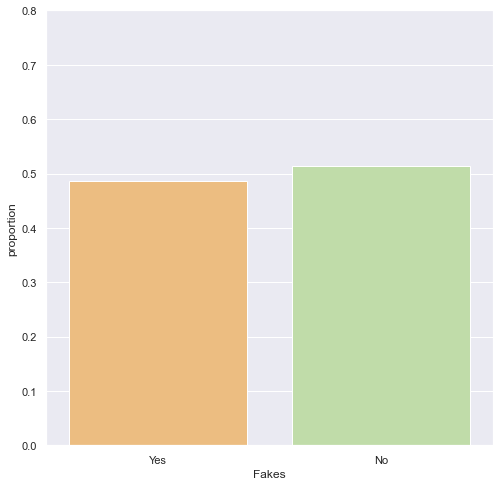

In [100]:
p1 = sns.barplot(x='fake', y='proportion_Fakes', data=Fake_News_Data, palette="Spectral") 
p1.set_yticks( np.arange(0, 0.85, 0.1)  )
p1.set_xticklabels(['Yes', 'No'])
p1.axes.set(xlabel='Fakes', ylabel='proportion')

In [101]:
[prop_Fake_yes , prop_Fake_no]

[0.48533488330501656, 0.5146651166949835]

In [102]:
Fake_News_Data['word_count'] = Fake_News_Data['text'].str.split().str.len()

In [103]:
Fake_News_Data.groupby('fake')['word_count'].mean()

fake
0    577.107969
1    506.322040
Name: word_count, dtype: float64

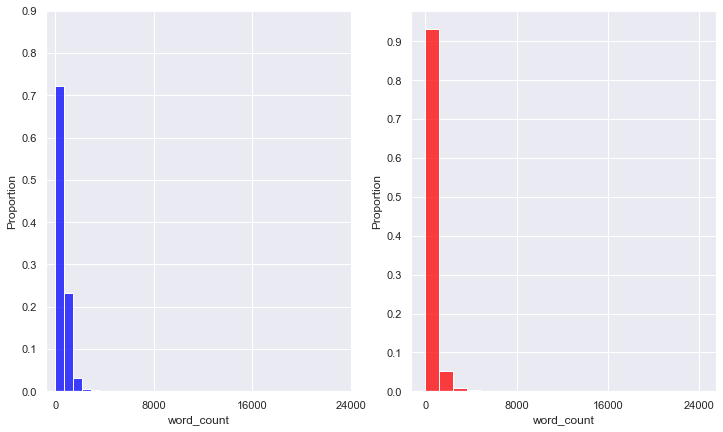

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))

p1 = sns.histplot(x=Fake_News_Data[Fake_News_Data['fake']==0]['word_count'], stat="proportion", bins=20, color="blue", ax=axs[0] )
p1.set_xticks( range(int(Fake_News_Data['word_count'].min()) , int(Fake_News_Data['word_count'].max() ) , 8000) )
p1.set_yticks( np.arange(0, 1, 0.1)  )

p2 = sns.histplot(x=Fake_News_Data[Fake_News_Data['fake']==1]['word_count'], stat="proportion", bins=20, color="red" , ax=axs[1])
p2.set_xticks( range(int(Fake_News_Data['word_count'].min()) , int(Fake_News_Data['word_count'].max() ) , 8000) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
CountVect = CountVectorizer(stop_words='english')
X_train_counts = CountVect.fit_transform(Fake_News_Data['text'])

In [107]:
X_train_counts.shape

(67098, 234143)

In [108]:
CountVect.vocabulary_.get('comment')

44043

In [109]:
CountVect.stop_words_

set()

In [110]:
def limpiar_tokenizar(texto):

    import re
    
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas

    nuevo_texto = texto.lower()
    
    # Eliminación de páginas web (palabras que empiezan por "http")
    
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    
    # Eliminación de signos de puntuación
    
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    
    # Eliminación de números
    
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    
    # Eliminación de espacios en blanco múltiples
    
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    
    # Tokenización por palabras individuales
    
    nuevo_texto = nuevo_texto.split(sep = ' ')
    
    # Eliminación de tokens con una longitud <= 1
    
    nuevo_texto = [token for token in nuevo_texto if len(token) >=  2]
    
    return(nuevo_texto)

In [111]:

test = "Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining"

print(limpiar_tokenizar(texto=test))

['esto', 'es', 'ejemplo', 'de', 'limpieza', 'de', 'texto', 'cienciadedatos', 'textmining']


In [112]:
Fake_News_Data['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [113]:
print(limpiar_tokenizar(texto=Fake_News_Data['text'][0]))

['no', 'comment', 'is', 'expected', 'from', 'barack', 'obama', 'members', 'of', 'the', 'fyf', 'or', 'fukyoflag', 'and', 'blacklivesmatter', 'movements', 'called', 'for', 'the', 'lynching', 'and', 'hanging', 'of', 'white', 'people', 'and', 'cops', 'they', 'encouraged', 'others', 'on', 'radio', 'show', 'tuesday', 'night', 'to', 'turn', 'the', 'tide', 'and', 'kill', 'white', 'people', 'and', 'cops', 'to', 'send', 'message', 'about', 'the', 'killing', 'of', 'black', 'people', 'in', 'america', 'one', 'of', 'the', 'yoflag', 'organizers', 'is', 'called', 'sunshine', 'she', 'has', 'radio', 'blog', 'show', 'hosted', 'from', 'texas', 'called', 'sunshine', 'ing', 'opinion', 'radio', 'show', 'snapshot', 'of', 'her', 'fyf', 'lolatwhitefear', 'twitter', 'page', 'at', 'shows', 'that', 'she', 'was', 'urging', 'supporters', 'to', 'call', 'now', 'fyf', 'tonight', 'we', 'continue', 'to', 'dismantle', 'the', 'illusion', 'of', 'white', 'below', 'is', 'snapshot', 'twitter', 'radio', 'call', 'invite', 'fyf',

In [114]:
Fake_News_Data['text_tokenizado'] = Fake_News_Data['text'].apply(lambda x: limpiar_tokenizar(x))

In [ ]:
Fake_News_Data = Fake_News_Data.drop('proportion_Fakes', axis=1)

Fake_News_Data

,title,text,fake,word_count,text_tokenizado
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,871,"[no, comment, is, expected, from, barack, obam..."
1,NaN,Did they post their votes for Hillary already?,1,8,"[did, they, post, their, votes, for, hillary, ..."
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,34,"[now, most, of, the, demonstrators, gathered, ..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,1321,"[dozen, politically, active, pastors, came, he..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,329,"[the, rs, sarmat, missile, dubbed, satan, will..."
...,...,...,...,...,...
67093,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1,796,"[judge, jeanine, lets, it, rip, she, concerned..."
67094,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,735,"[washington, reuters, hackers, believed, to, b..."
67095,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,604,"[you, know, because, in, fantasyland, republic..."
67096,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,477,"[migrants, refuse, to, leave, train, at, refug..."


In [ ]:
Fake_News_Tokens = Fake_News_Data.loc[:, ['text_tokenizado', 'fake'] ].explode(column='text_tokenizado')

In [ ]:
Fake_News_Tokens = Fake_News_Data.rename(columns={'text_tokenizado':'token'})

In [ ]:
Fake_News_Data

,token,fake
0,no,1
0,comment,1
0,is,1
0,expected,1
0,from,1
...,...,...
67097,hamburg,0
67097,“we’re,0
67097,right,0
67097,behind,0
